In [1]:
import pandas as pd
import numpy as np

# 타이타닉 문제로 decision tree를 해보자!

In [139]:
train = pd.read_csv("titanic_data/train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# 탐색적 분석 방법 (EDA : Exploratory Data Analysis)
# head / info 찍어보기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
train.describe() # data 이해에 도움이 많이 된당

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
pd.crosstab(train.Age,train.Pclass).head() # df에서 빈도볼려면 crosstab이나 pivot_table

Pclass,1,2,3
Age,,,
0.42,0,0,1
0.67,0,1,0
0.75,0,0,2
0.83,0,2,0
0.92,1,0,0


In [27]:
train.pivot_table(index='Pclass',columns='Survived',values='Fare',aggfunc='mean').head()

Survived,0,1
Pclass,,
1,64.684008,95.608029
2,19.412328,22.055700
3,13.669364,13.694887


In [30]:
train.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [32]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [29]:
train.pivot_table(index='Sex',values='Survived',aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


In [34]:
train.pivot_table(index='Sex') # default : col - 모든컬럼 / aggfunc - mean

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Sex,,,,,,,
female,27.915709,44.479818,0.649682,431.028662,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,454.147314,2.389948,0.429809,0.188908


In [41]:
train.groupby('Sex')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


In [42]:
# 성별 / 선실 등급별 생존률
train.pivot_table(index='Sex',columns='Pclass',values='Survived')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [47]:
train.pivot_table(index=['Sex','Pclass'], values='Survived')

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [55]:
train.pivot_table(index=['Sex','Pclass'], values='Survived').unstack(1)
# 여기선 -1이 1: 제일 뒤에있는 놈

Survived                    
Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [61]:
# 걍 허접한걸로 하나 내보자
test['Survived'] = np.where(test['Sex']=='male',0,1)

In [63]:
test['Survived'].head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int32

In [64]:
test['Survived'] = (test.Sex == 'female') & (test.Age > 0) & (test.Embarked.notnull())

In [66]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,True
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,True


In [70]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [73]:
submission = test[['PassengerId','Survived']].copy()
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null bool
dtypes: bool(1), int64(1)
memory usage: 3.8 KB


In [75]:
submission['Survived'] = submission['Survived'].astype(int)
submission.head() # 오 true / false => astype쓰면 알아서 0,1됨

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [77]:
submission.to_csv('sub.csv',index=False) # index false주면 index 안나옴

In [79]:
submission.set_index('PassengerId').head() # 요 방식으로도 바꿀 수 있을듯

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [82]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

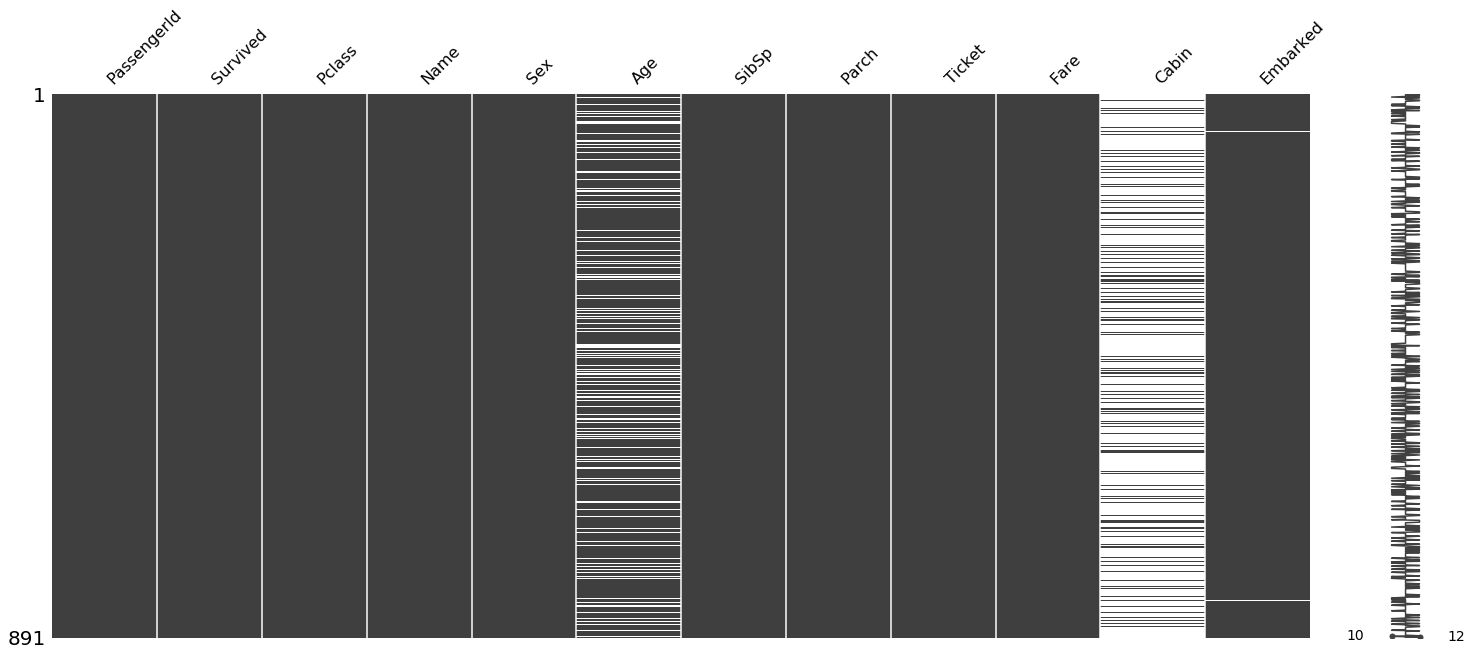

In [84]:
import missingno as msno
msno.matrix(train) # 없는거 찾아주는 모듈 : 없는건 흰색

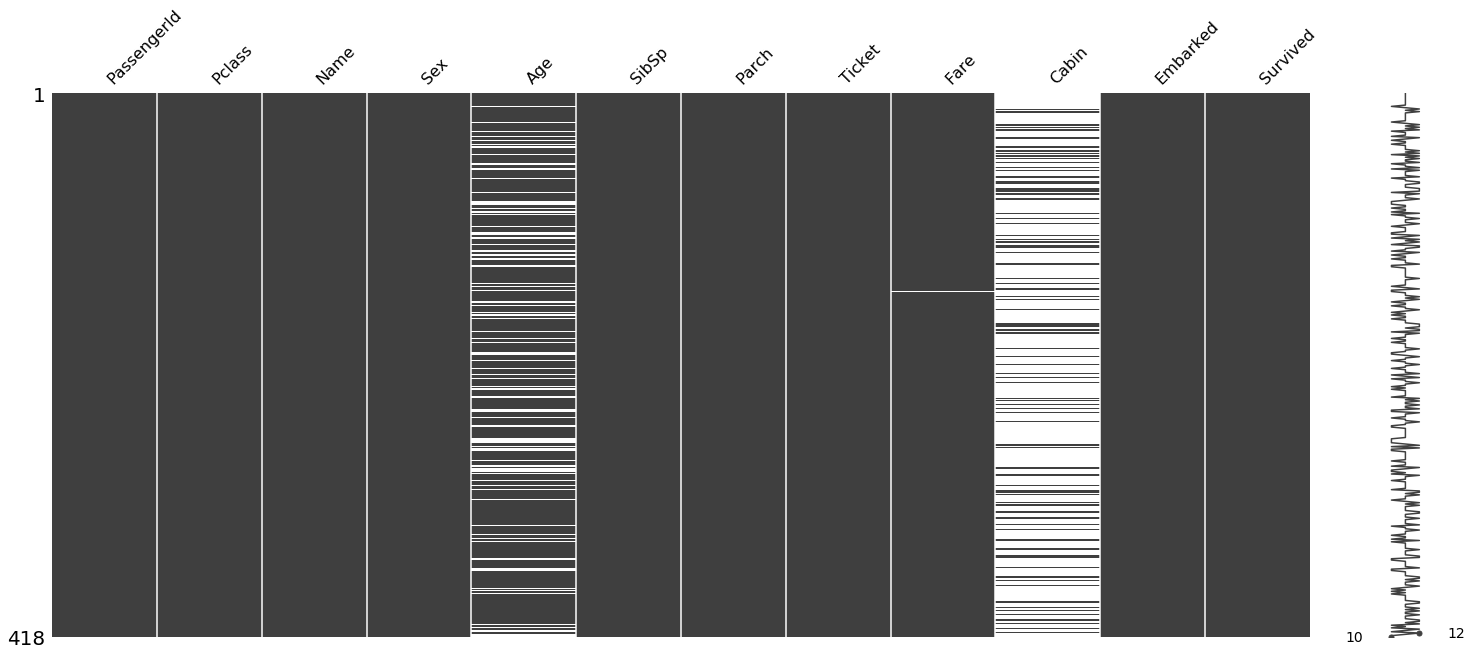

In [85]:
msno.matrix(test)

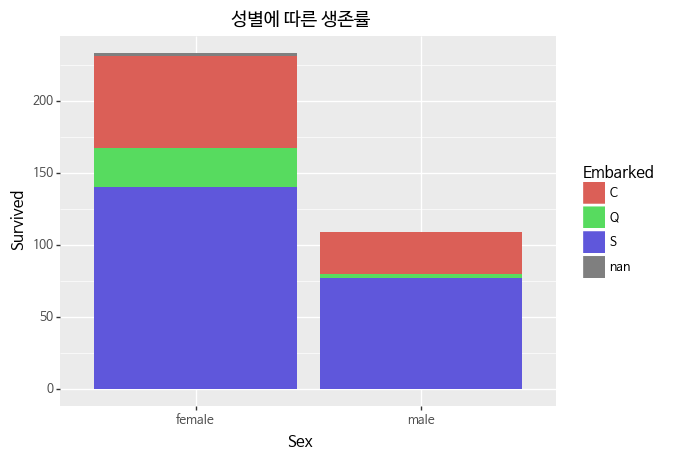

<ggplot: (-9223371921340094425)>

In [93]:
# pip install plotnine
from plotnine import *
(ggplot(train)
+aes(x="Sex", y="Survived",fill='Embarked')
+geom_col()
+ggtitle('성별에 따른 생존률')
+theme(text=element_text(family="NanumBarunGothic")))

In [94]:
# 등급별로 건수 세려면
train.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

In [105]:
train['Pclass'] = train['Pclass'].value_counts().astype('str') # 정수 => 문자형 변환

In [106]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,NaN,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,216,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,184,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,491,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,NaN,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


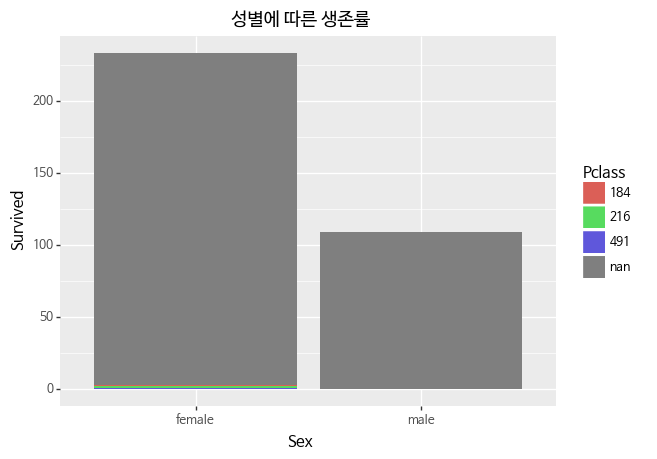

<ggplot: (-9223371921339485531)>

In [107]:
# 이게 뭔일임 ㅋㅋ
(ggplot(train)
+aes(x="Sex", y="Survived",fill='Pclass')
+geom_col()
+ggtitle('성별에 따른 생존률')
+theme(text=element_text(family="NanumBarunGothic")))

In [108]:
train_drop_age = train['Age'].dropna()
train_drop_age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
18     31.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
27     19.0
30     40.0
33     66.0
34     28.0
35     42.0
37     21.0
38     18.0
       ... 
856    45.0
857    51.0
858    24.0
860    41.0
861    21.0
862    48.0
864    24.0
865    42.0
866    27.0
867    31.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [109]:
df = pd.DataFrame({
    'num' : range(5),
    'name' : ['alsdof2(39#@_)','sdfkhsd','dls223','sldfsn@gmail.com','sldfnsfd23__']
})

In [126]:
df.name.str.findall('([^@_]*)@([^@_]*)\\.([a-z]*)')

0                        []
1                        []
2                        []
3    [(sldfsn, gmail, com)]
4                        []
Name: name, dtype: object

In [128]:
train['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [129]:
train['Fare'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


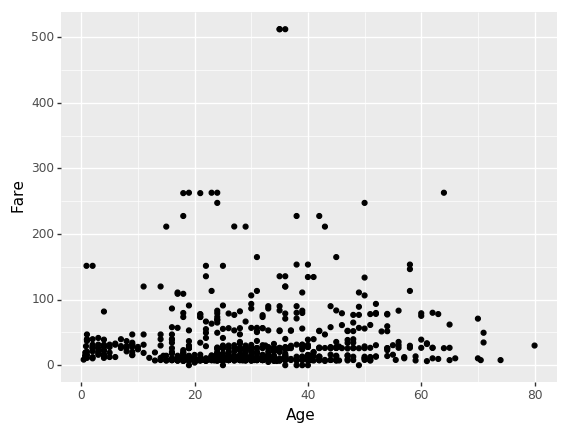

<ggplot: (115515273599)>

In [131]:
(ggplot(train)
+aes(x='Age',y='Fare')
+geom_point())

C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


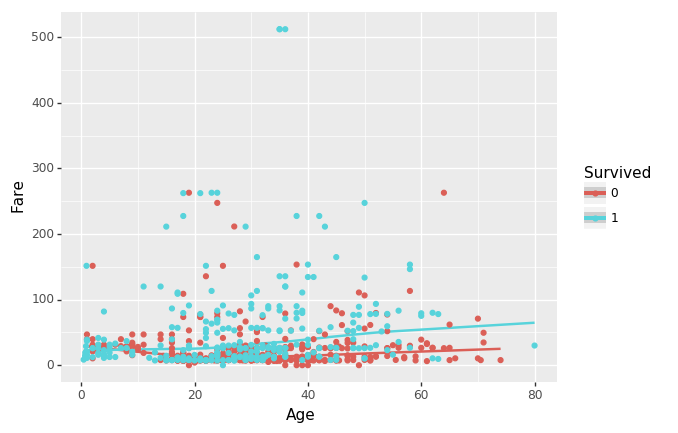

<ggplot: (115514844806)>

In [164]:
# 연령대(x)와 운임(y) 생존률
train['Survived'] = train['Survived'].astype('category')
(ggplot(train)
+aes(x='Age',y='Fare',color='Survived') # survived가 int이기 때문에 이렇게 나옴
+stat_smooth() # 뭐여
+geom_point()
)

C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


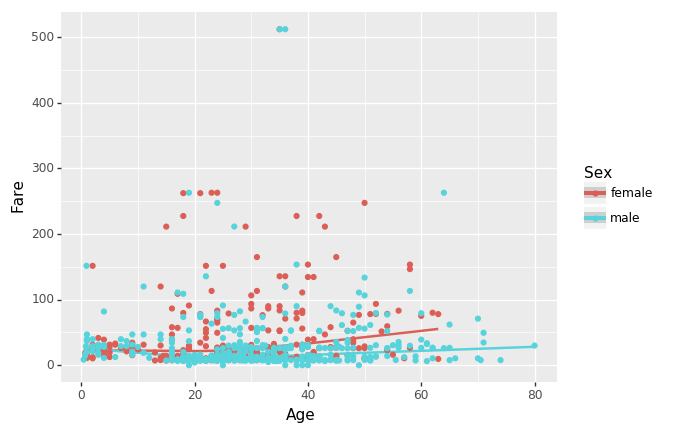

<ggplot: (115516154365)>

In [140]:
# 연령대(x)와 운임(y) 생존률
(ggplot(train)
+aes(x='Age',y='Fare',color='Sex')
+stat_smooth() # 뭐여
+geom_point()
)

C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


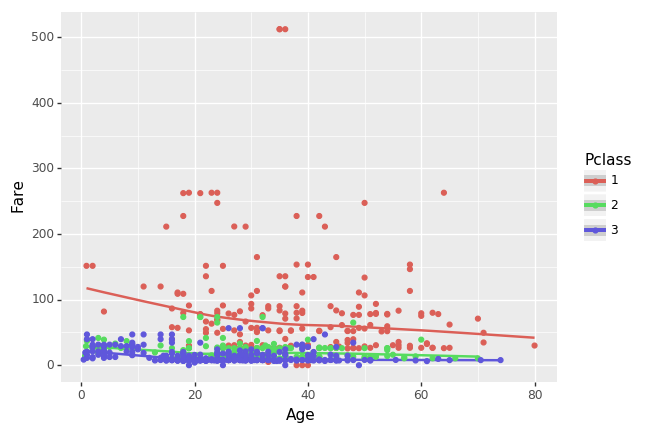

<ggplot: (-9223371921338403994)>

In [142]:
train['Pclass'] = train['Pclass'].astype('category')
(ggplot(train)
+aes(x='Age',y='Fare',color='Pclass')
+stat_smooth() # 뭐여
+geom_point()
)

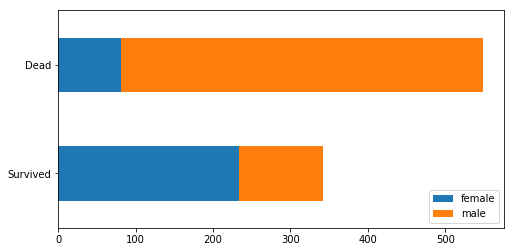

In [152]:
def bar_chart(f):
    survived = train[train['Survived']==1][f].value_counts()
    dead = train[train['Survived']==0][f].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='barh', stacked=True, figsize=(8,4)) # default => line
bar_chart('Sex')

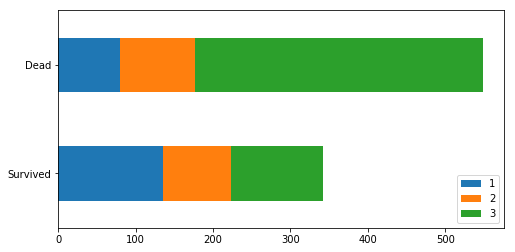

In [151]:
bar_chart('Pclass')

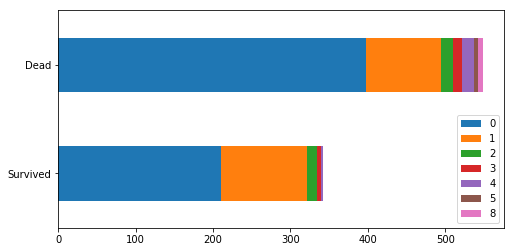

In [157]:
bar_chart('SibSp')

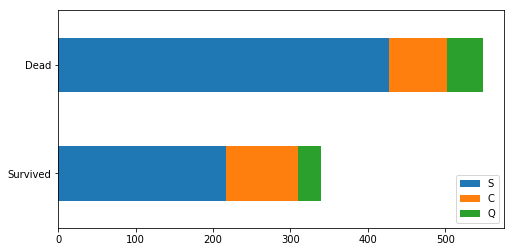

In [158]:
bar_chart('Embarked')

C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


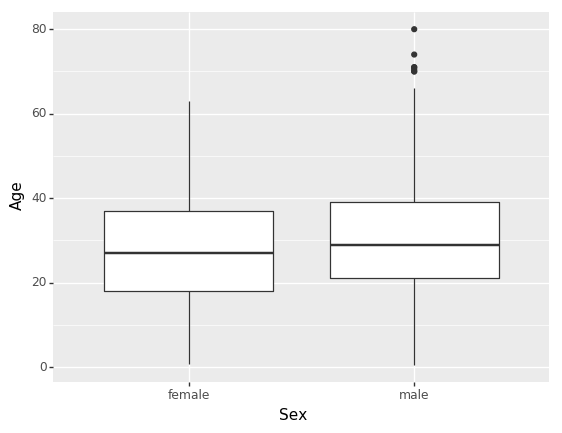

<ggplot: (-9223371921355764757)>

In [159]:
(ggplot(train)
+aes(x='Sex', y='Age')
+geom_boxplot())

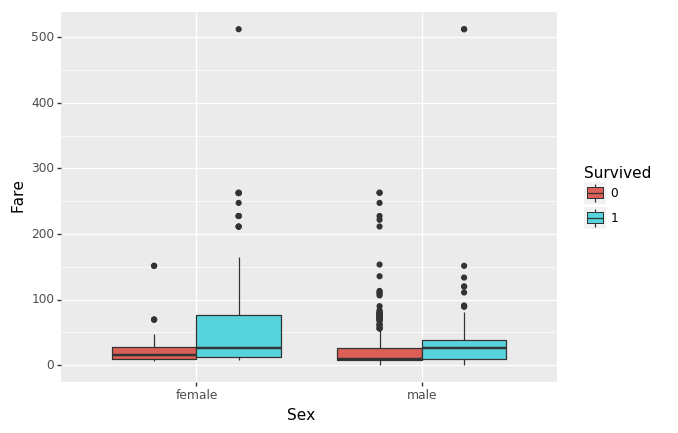

<ggplot: (-9223371921339823623)>

In [165]:
(ggplot(train)
+aes(x='Sex', y='Fare', fill='Survived')
+geom_boxplot())
# 이상치 많네

C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


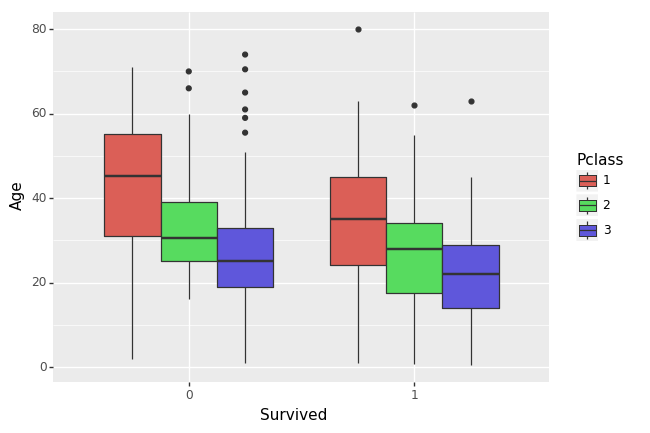

<ggplot: (115514851539)>

In [166]:
(ggplot(train)
+aes(x='Survived', y='Age', fill='Pclass')
+geom_boxplot())
# 이상치 많네

In [177]:
# 결측치 채우기
train['Age_median'] = train['Age']
train['Age_mean'] = train['Age']
train['Age_mode'] = train['Age']
train['Age_median'] = train['Age_median'].fillna(train['Age_median'].median())
train['Age_mean'].fillna(train['Age_median'].mean(), inplace=True)
train['Age_mode'].fillna(train['Age_mode'].mode()[0], inplace=True)
# mode의 return이 series라서 [0]인덱스 지정요
# train['Age_mode'].mode()

In [178]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Age_median     891 non-null float64
Age_mean       891 non-null float64
Age_mode       891 non-null float64
dtypes: category(2), float64(5), int64(3), object(5)
memory usage: 92.5+ KB


C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_bin : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


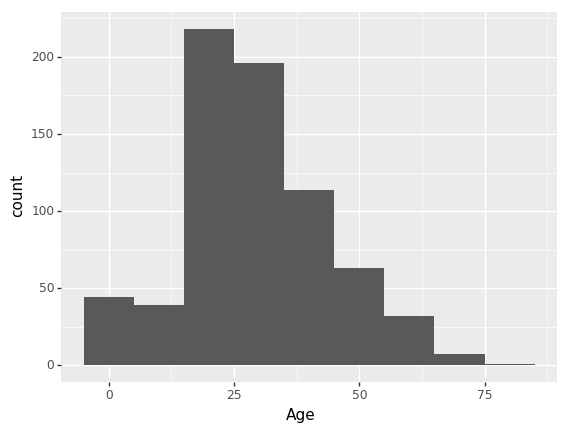

<ggplot: (-9223371921336175535)>

In [179]:
(ggplot(train)
+aes(x='Age')
+geom_histogram(binwidth=10)) # 자동 10개구간 나눠주기

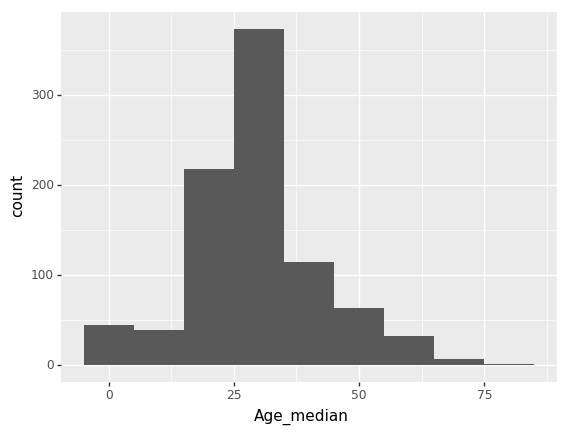

<ggplot: (115518621013)>

In [180]:
(ggplot(train)
+aes(x='Age_median')
+geom_histogram(binwidth=10)) # 자동 10개구간 나눠주기

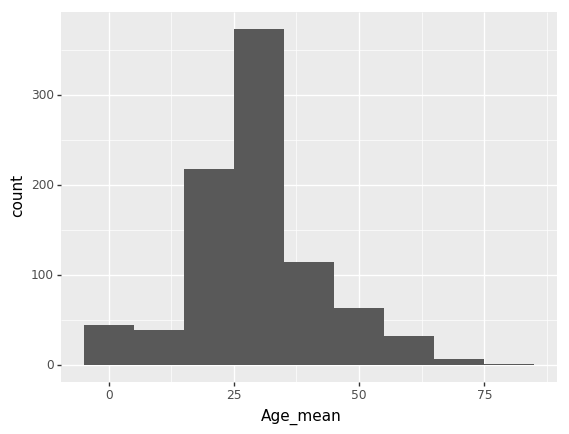

<ggplot: (115518663239)>

In [181]:
(ggplot(train)
+aes(x='Age_mean')
+geom_histogram(binwidth=10)) # 자동 10개구간 나눠주기

In [182]:
train_test_data = [train,test]
train_test_data

[     PassengerId Survived Pclass  \
 0              1        0      3   
 1              2        1      1   
 2              3        1      3   
 3              4        1      1   
 4              5        0      3   
 5              6        0      3   
 6              7        0      1   
 7              8        0      3   
 8              9        1      3   
 9             10        1      2   
 10            11        1      3   
 11            12        1      1   
 12            13        0      3   
 13            14        0      3   
 14            15        0      3   
 15            16        1      2   
 16            17        0      3   
 17            18        1      2   
 18            19        0      3   
 19            20        1      3   
 20            21        0      2   
 21            22        1      2   
 22            23        1      3   
 23            24        1      1   
 24            25        0      3   
 25            26        1      3   
 

In [232]:
for data in train_test_data:
    # 정규표현식 사용 => 호칭 추출 => 호칭별 건수 출력
    data['title'] = data['Name'].str.findall('.*, ([^.\s]*)')
#     print(data['title'])s
#     print(data.title.map(lambda x:x[0]))
    data['title'] = data['title'].map(lambda x :x[0])
#     print(data['title'])
    print(data.title.value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
the           1
Don           1
Sir           1
Ms            1
Mme           1
Jonkheer      1
Capt          1
Lady          1
Name: title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: title, dtype: int64


In [233]:
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_mean,Age_mode,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,22.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,38.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,26.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,35.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,35.0,Mr


In [242]:
import numpy as np

for data in train_test_data:
    data['OHE'] = np.where(data['title'].values=='Mr',0,
                          np.where(data['title'].values=='Miss',1,
                                  np.where(data['title'].values=='Mrs',2,3)))

In [243]:
train_test_data[0].OHE.head()

0    0
1    2
2    1
3    2
4    0
Name: OHE, dtype: int32